# 1. Problem Statement: 

To predict whether the customer would pay the next premium or not, given the information about past premium payment history for the policyholders. 

**Since the target variable is provided for the training dataset, its a supervised learning based classification problem.**

In [1]:
# Importing required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from scipy import stats


In [2]:
# Reading the training set

df = pd.read_csv('train.csv')

# Viewing the top 5 records of the dataset

df.head().transpose()

,0,1,2,3,4
id,110936,41492,31300,19415,99379
perc_premium_paid_by_cash_credit,0.429,0.01,0.917,0.049,0.052
age_in_days,12058,21546,17531,15341,31400
Income,355060,315150,84140,250510,198680
Count_3-6_months_late,0,0,2,0,0
Count_6-12_months_late,0,0,3,0,0
Count_more_than_12_months_late,0,0,1,0,0
application_underwriting_score,99.02,99.89,98.69,99.57,99.87
no_of_premiums_paid,13,21,7,9,12
sourcing_channel,C,A,C,A,B


In [3]:
# Checking on the type of variables

df.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

In [4]:
# Checking the dimensions of the dataset

df.shape

(79853, 12)

# 2. Hypothesis: (Testing done in 3.2)

1. The residence area type of a customer and his ability for premium payment are dependent - Chi square
2. The sourcing channel and the customer's ability for premium payment are dependent - Chi-square
3. Income of a customer and his ability for premium payment are dependent - Point bi serial correlation
4. Age of the customer and his income are related - Correlation
5. Underwriting score and the customer's ability for premium payment are dependent - Point bi serial correlation
6. No. of premiums paid and the customer's income are related. - correlation
7. There is a significant difference in income between the customers who paid the premium and who did'nt. - 2 sample t-test
8. There is a significant difference in age between the customers who paid the premium and who did'nt. - 2 sample t-test
9. The average age of people who dont pay the next premium is greater than 20075 day.s (55 yrs) - 1 sample t-test
10. Income and percentage of premium paid by the customer are dependent - correlation
11. There is a significant relationship between the no. of months a customer has paid the late premium and his ability to pay future premiums - Point bi serial correlation
12. The average percentage of premium paid by a customer who defaulted is less than 50% - 1 sample t-test


# 3. Exploratory Data Analysis (EDA)

In [5]:
#summarizing all the continous variables

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,79853.0,57167.166368,32928.970160,2.0,28640.000,57262.000,85632.000,114076.00
perc_premium_paid_by_cash_credit,79853.0,0.314288,0.334915,0.0,0.034,0.167,0.538,1.00
age_in_days,79853.0,18846.696906,5208.719136,7670.0,14974.000,18625.000,22636.000,37602.00
Income,79853.0,208847.171177,496582.597257,24030.0,108010.000,166560.000,252090.000,90262600.00
Count_3-6_months_late,79756.0,0.248671,0.691468,0.0,0.000,0.000,0.000,13.00
Count_6-12_months_late,79756.0,0.078188,0.436507,0.0,0.000,0.000,0.000,17.00
Count_more_than_12_months_late,79756.0,0.060008,0.312023,0.0,0.000,0.000,0.000,11.00
application_underwriting_score,76879.0,99.067291,0.739799,91.9,98.810,99.210,99.540,99.89
no_of_premiums_paid,79853.0,10.863887,5.170687,2.0,7.000,10.000,14.000,60.00
target,79853.0,0.937410,0.242226,0.0,1.000,1.000,1.000,1.00


In [6]:
#Checking whether the data is a balanced set

df['target'].value_counts()/len(df)

1    0.93741
0    0.06259
Name: target, dtype: float64

Continuous variables: ['perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid']


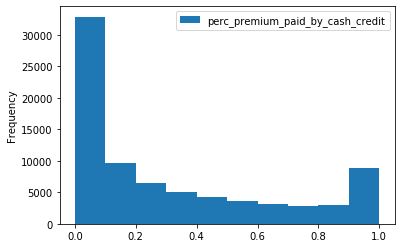

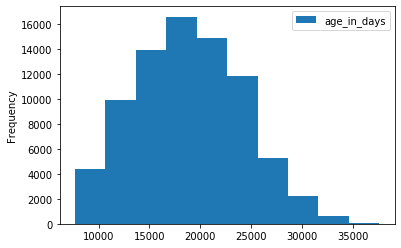

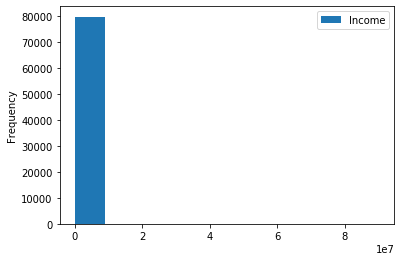

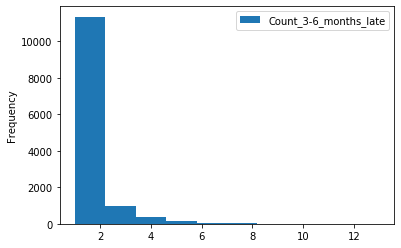

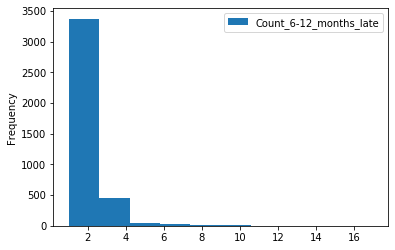

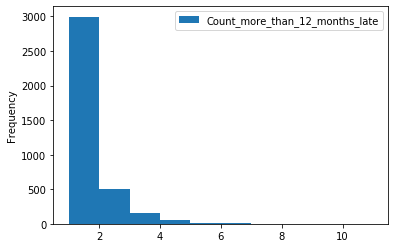

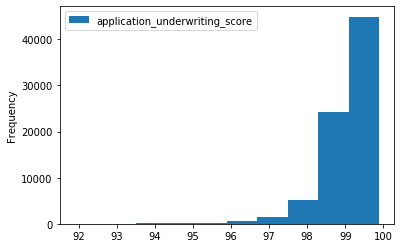

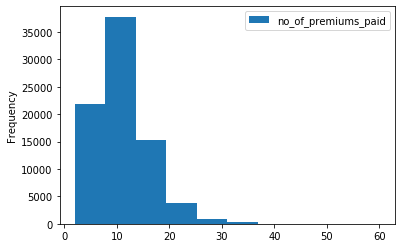

In [7]:
# Identifying continuous variables

cont_var = []
cont_var = df.describe().transpose().index.to_list()

#removing the Id column and target variable
cont_var.remove('id')
cont_var.remove('target')
print("Continuous variables:", cont_var)

# Creating histograms for all the continuous variables

for i in range(len(cont_var)): 
    
    if cont_var[i] == 'Count_more_than_12_months_late' or cont_var[i] == 'Count_3-6_months_late' or cont_var[i] == 'Count_6-12_months_late':
        col=df[cont_var[i]][df[cont_var[i]]>0].to_frame() #Excluding value 0 while plotting for count of months variables
    else:
        col = df[cont_var[i]].to_frame()        
    col.plot.hist()
        

Categorical variables: ['id', 'sourcing_channel', 'residence_area_type', 'target']


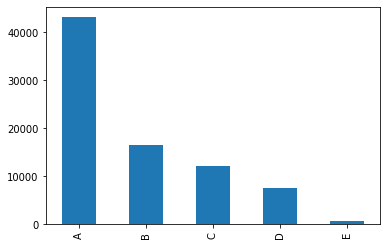

In [8]:
# Identifying all categorical variables

cat_var =[]
all_cols = df.columns
for i in all_cols:
    if i not in cont_var:
        cat_var.append(i)
print("Categorical variables:", cat_var)

# Creating bar plots for all categorical variable - sourcing_channel
 
df['sourcing_channel'].value_counts().plot.bar()

In [9]:
# Summarizing categorical variable - Sourcing channel in %

df.groupby('sourcing_channel')['id'].count()/len(df['sourcing_channel'])*100

sourcing_channel
A    54.016756
B    20.677996
C    15.076453
D     9.466144
E     0.762651
Name: id, dtype: float64

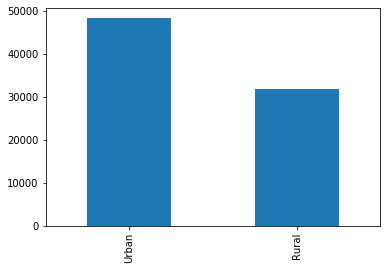

In [10]:
# Creating bar plots for all categorical variable - residence_area_type

df['residence_area_type'].value_counts().plot.bar()

In [11]:
# Summarizing categorical variable - Residence area type in %

df.groupby('residence_area_type')['id'].count()/len(df['residence_area_type'])*100

residence_area_type
Rural    39.660376
Urban    60.339624
Name: id, dtype: float64

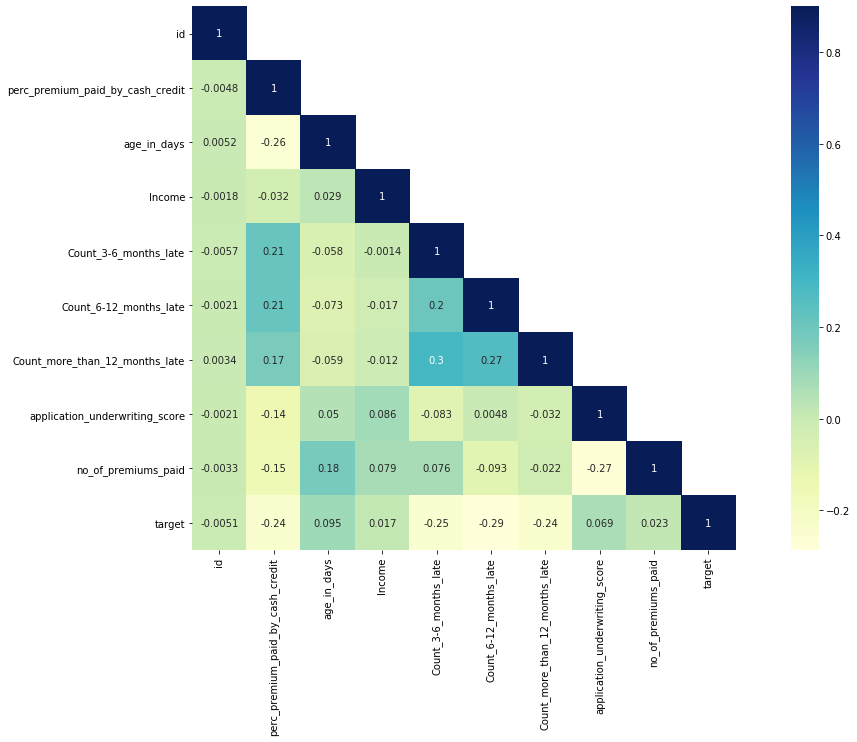

In [12]:
# Indetifying the correlated variables

corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

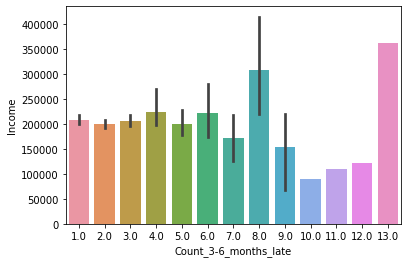

In [13]:
# Bar plots for customer income by counts of month (3-6) for late premium paid.

sn.barplot(x = df['Count_3-6_months_late'][df['Count_3-6_months_late']>0], y = df['Income'] )

In [14]:
# Cross tabulation by outcomes for Count_3-6_months_late

pd.crosstab(df['Count_3-6_months_late'][df['Count_3-6_months_late']>0],df['target'])

target,0,1
Count_3-6_months_late,,
1.0,1153,7673
2.0,592,1927
3.0,288,666
4.0,158,216
5.0,67,101
6.0,31,37
7.0,10,13
8.0,6,9
9.0,2,2


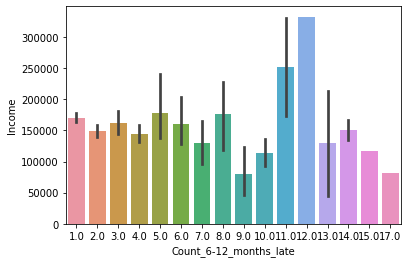

In [15]:
# Bar plots for customer income by counts of month (6-12) for late premium paid.

sn.barplot(x = df['Count_6-12_months_late'][df['Count_6-12_months_late']>0], y = df['Income'] )

In [16]:
# Cross tabulation by outcomes for Count_6-12_months_late

pd.crosstab(df['Count_6-12_months_late'][df['Count_6-12_months_late']>0],df['target'])

target,0,1
Count_6-12_months_late,,
1.0,828,1852
2.0,334,359
3.0,185,132
4.0,85,45
5.0,30,16
6.0,13,13
7.0,7,4
8.0,3,2
9.0,2,2


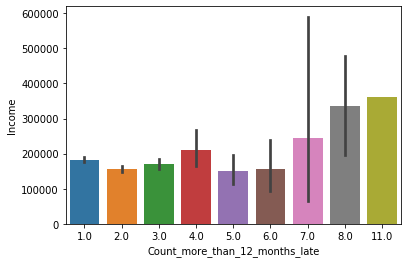

In [17]:
# Bar plots for customer income by counts of month (above 12) for late premium paid.

sn.barplot(x = df['Count_more_than_12_months_late'][df['Count_more_than_12_months_late']>0], y = df['Income'] )

In [18]:
# Cross tabulation by outcomes for Count_more_than_12_months_late

pd.crosstab(df['Count_more_than_12_months_late'][df['Count_more_than_12_months_late']>0],df['target'])

target,0,1
Count_more_than_12_months_late,,
1.0,835,2161
2.0,228,270
3.0,85,66
4.0,25,23
5.0,7,6
6.0,4,2
7.0,2,1
8.0,1,1
11.0,1,0


In [19]:
# Cross tabulation by outcomes for residence_area_type

pd.crosstab(df['residence_area_type'],df['target'],normalize='columns')

target,0,1
residence_area_type,,
Rural,0.39976,0.396393
Urban,0.60024,0.603607


In [20]:
# Cross tabulation by outcomes for sourcing_channel

pd.crosstab(df['sourcing_channel'],df['target'],normalize='columns')

target,0,1
sourcing_channel,,
A,0.469988,0.544853
B,0.213285,0.206346
C,0.180672,0.148768
D,0.126851,0.092512
E,0.009204,0.007521


## 3.1 Univariate & Bivariate data analysis Inferences:

**1. There are missing data for the variables Count_3-6_months_late, Count_6-12_months_late, Count_more_than_12_months_late and application_underwriting_score.**

**2. Majority of the cutomers (54%) in the sample are sourced through the sourcing channel A.**

**3. 60% of the customers in the sample are from Urban residential area.**

**4. Age of the customers is approximately in normal distribution**

**5. There is a strong negative correlation between the nummber of times a customer delays payment in the past months and his ability to pay the next premium.**

**6. 60% of the defaulters are from Urban residential area**

**7. 46% of the defaulter are sourced through channel A**

**8. The dataset is balanced in a decent way.**

**9.There is weak correleation among most of the variables.**

**10. There is a positive correlation between the nummber of times a customer delays payment in the past months and the percentage of the premium he has paid so far.**


## 3.2 Hypothesis Testing:

### 3.2.1 Hypothesis 1

Ho - The residence area type of a customer and his ability for premium payment are independent

Ha - The residence area type of a customer and his ability for premium payment are dependent 

Test - Chi-square test of independence 


In [21]:
# chi-square test of indepence for residence_area_type and target

from scipy.stats import chi2_contingency

chisquare_stat, p_value, dof, expected = chi2_contingency(pd.crosstab(df['residence_area_type'],df['target']))
print("t_statistic -",chisquare_stat, ", p_value -" , p_value)

t_statistic - 0.2080863817891421 , p_value - 0.6482714305747836


Since P value > 0.05, we fail to reject the null hypothesis.

### 3.2.2 Hypothesis 2

Ho - The sourcing channel and the customer's ability for premium payment are independent

Ha - The sourcing channel and the customer's ability for premium payment are dependent 

Test - Chi-square test of independence 


In [22]:
# chi-square test of indepence for sourcing_channel and target

chisquare_stat, p_value, dof, expected = chi2_contingency(pd.crosstab(df['sourcing_channel'],df['target']))
print("t_statistic -",chisquare_stat, ", p_value -" , p_value)

t_statistic - 141.43673259821205 , p_value - 1.390061884429808e-29


Since P value < 0.05, we reject the null hypothesis.

### 3.2.3 Hypothesis 3

Ho - Income of a customer and his ability for premium payment are independent

Ha - Income of a customer and his ability for premium payment are dependent 

Test -  Point bi serial correlation 


In [23]:
#Correlation for Income and target

stats.pointbiserialr(df['Income'], df['target'])

PointbiserialrResult(correlation=0.016541208055673, pvalue=2.946615108531472e-06)

Since P value < 0.05, the null hypothes is rejected. 

### 3.2.4 Hypothesis 4

Ho - Age of the customer and his income are not related

Ha - Age of the customer and his income are related 

Test - Correlation


In [24]:
#Correlation for Income and age

stats.pearsonr(df['age_in_days'],df['Income'])

(0.02930792084733421, 1.195447691481687e-16)

Since P value < 0.05, the null hypothes is rejected. 

### 3.2.5 Hypothesis 5

Ho - Underwriting score and the customer's ability for premium payment are independent

Ha - Underwriting score and the customer's ability for premium payment are dependent 

Test - Point bi serial correlation


In [25]:
#Correlation for target and underwriting score

df_copy = df
df_copy.dropna(inplace= True)
stats.pointbiserialr(df_copy['application_underwriting_score'], df_copy['target'])

PointbiserialrResult(correlation=0.06979924435438947, pvalue=1.2898372569281858e-83)

Since P value is less than 0.05, the null hypothesis rejected. 

### 3.2.6 Hypothesis 6

Ho - No. of premiums paid and the customer's income are not related.

Ha - No. of premiums paid and the customer's income are related. 

Test - Correlation 


In [26]:
#Correlation for Income and no. of premiums paid

stats.pearsonr(df['no_of_premiums_paid'],df['Income'])

(0.10438428230394584, 4.015550261118411e-185)

Since P value is less than 0.05, the null hypothesis rejected. 

### 3.2.7 Hypothesis 7

Ho - There is no significant difference in income between the customers who paid the premium and who did'nt.

Ha - There is a significant difference in income between the customers who paid the premium and who did'nt.

Test - 2 sample t-test , two-tailed


In [29]:
#  2 sample t-test for income by target

t_statistic, _ = stats.ttest_ind(df['Income'][df['target']==0],df['Income'][df['target']==1])
print("t_statistic-",t_statistic)
dof =df['Income'][df['target']==0].count() + df['Income'][df['target']==1].count() - 1
print("Tc -/+",stats.t.ppf(0.05/2,df=dof))

t_statistic- -5.557991356676819
Tc -/+ -1.9599948522626998


Since t_statistic doesnt not lie within the T-critical area, the null hypothesis is rejected.

### 3.2.8 Hypothesis 8

Ho - There is no significant difference in age between the customers who paid the premium and who did'nt. 

Ha - There is a significant difference in age between the customers who paid the premium and who did'nt.  

Test - 2 sample t-test , two-tailed


In [32]:
#  2 sample t-test for age by target

t_statistic, _ = stats.ttest_ind(df['age_in_days'][df['target']==0],df['age_in_days'][df['target']==1])
print("t_statistic-",t_statistic)
dof =df['age_in_days'][df['target']==0].count() + df['age_in_days'][df['target']==1].count() - 1
print("Tc -/+",stats.t.ppf(0.05/2,df=dof))

t_statistic- -25.73306874108016
Tc -/+ -1.9599948522626998


Since t_statistic doesnt not lie within the T-critical area, the null hypothesis is rejected.

### 3.2.9 Hypothesis 9

Ho - The average age of people who dont pay the next premium is less than or equal to 20075 day.s (55 yrs) 

Ha - The average age of people who dont pay the next premium is greater than 20075 day.s (55 yrs) 

Test - 1 sample t-test, right tailed


In [33]:
# 1 sample t-test fot target and age

t_statistic, _ = stats.ttest_1samp(df[df['target']==0]['age_in_days'], 20075)
N = df[df['target']==0]['age_in_days'].count()

Tc = (stats.t.ppf(0.05, df=N-1))

print("t_statistic -",t_statistic, ", t_critical -" , Tc)

t_statistic - -46.525169885732765 , t_critical - -1.6451725360049116


Since T_statistic < T_critical, we fail to reject null hypothesis.

### 3.2.10 Hypothesis 10

Ho - Income and percentage of premium paid by the customer are independent

Ha - Income and percentage of premium paid by the customer are dependent 

Test - correlation


In [34]:
#Correlation for Income and % of premium paid 

stats.pearsonr(df['perc_premium_paid_by_cash_credit'],df['Income'])

(-0.037196938557830156, 6.002435969124594e-25)

Since P value is less than 0.05, the null hypothesis rejected. 

### 3.2.11 Hypothesis 11

Ho - There is no significant relationship between the no. of months a customer has paid the late premium and his ability to pay future premiums

Ha - There is a significant relationship between the no. of months a customer has paid the late premium and his ability to pay future premiums 

Test - Point bi serial correlation 


In [35]:
#Correlation for target and no.of permiums paid

stats.pointbiserialr(df['no_of_premiums_paid'], df['target'])

PointbiserialrResult(correlation=0.018319604148599136, pvalue=3.7934929112420323e-07)

Since P value is less than 0.05, the null hypothesis rejected. 

### 3.2.12 Hypothesis 12

Ho - The average percentage of premium paid by a customer who defaulted is greater than or equal to 50% 

Ha - The average percentage of premium paid by a customer who defaulted is less than 50%  

Test - 1 sample t-test , left tailed


In [36]:
# 1 sample t-test for target and % premium paid

t_statistic, _ = stats.ttest_1samp(df[df['target']==0]['perc_premium_paid_by_cash_credit'], 0.5)
N = df[df['target']==0]['perc_premium_paid_by_cash_credit'].count()

Tc = (stats.t.ppf(0.05, df=N-1))

print("t_statistic -",t_statistic, ", t_critical -" , Tc)

t_statistic - 23.17772731608718 , t_critical - -1.6451725360049116


Since T_statistic < T_critical, we reject null hypothesis.

## 3.3 Hypothesis Testing Inferences:

**1. The residence area type of a customer and his ability for premium payment are independent**

**2. The sourcing channel and the customer's ability for premium payment are dependent**

**3. Income of a customer and his ability for premium payment are weakly dependent**

**4. Age of the customer and his income are weakly related**

**5. Underwriting score and the customer's ability for premium payment are weakly dependent**

**6. No. of premiums paid and the customer's income are weakly related.**

**7. There is a significant difference in income between the customers who paid the premium and who did'nt.**

**8. There is a significant difference in age between the customers who paid the premium and who did'nt.**

**9. The average age of people who dont pay the next premium is less than or equal to 20075 day.s (55 yrs)**

**10. Income and percentage of premium paid by the customer are weakly and neagatively dependent**

**11. There is a significant relationship between the no. of months a customer has paid the late premium and his ability to pay future premiums**

**12. The average percentage of premium paid by a customer who defaulted is less than 50%**


# 4. Missing Data



In [37]:
# Total number of rows in the training dataset

df.shape[0]

76855

In [38]:
# Number of rows having missing values in training dataset

df.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
dtype: int64

In [40]:
# Reading the test set

final_test = pd.read_csv('test.csv')

# Total number of rows in the test dataset

final_test.shape[0]

34224

In [41]:
# Number of rows having missing values in test dataset

final_test.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

## 4.1 Identifying nature of missing values

In [42]:
#extract missing records and check for any pattern within

train_df = pd.read_csv("train.csv")
df2=train_df.notnull()
df2

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
79848,True,True,True,True,True,True,True,True,True,True,True,True
79849,True,True,True,True,True,True,True,True,True,True,True,True
79850,True,True,True,True,True,True,True,True,True,True,True,True
79851,True,True,True,True,True,True,True,True,True,True,True,True


In [43]:
# Summarizing 

df2['application_underwriting_score'].value_counts()

True     76879
False     2974
Name: application_underwriting_score, dtype: int64

In [44]:
# Summarizind the total missing value counts by flaging them as row with missing value (flag =1) or not (flag =0)

flag=[]
for x in range(len(df2)):
    if df2['Count_3-6_months_late'][x] and df2['Count_6-12_months_late'][x] and df2['Count_more_than_12_months_late'][x] and df2['application_underwriting_score'][x] :
        flag.append(1)
    else:
        flag.append(0)
train_df['flag'] = flag
train_df['flag'].value_counts()

1    76855
0     2998
Name: flag, dtype: int64

In [45]:
# Creating crosstab for all categorical variable - residence_area_type

train_df['residence_area_type'][train_df['flag']==0].value_counts()

Urban    1855
Rural    1143
Name: residence_area_type, dtype: int64

In [46]:
# Creating crosstab for all categorical variable - residence_area_type

train_df['sourcing_channel'][train_df['flag']==0].value_counts()

A    2225
B     438
C     198
D     127
E      10
Name: sourcing_channel, dtype: int64

In [47]:
# Summarizing the rows with missing values

train_df[train_df['flag']==0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,2998.0,57443.939960,3.258509e+04,59.00,29171.750,57803.000,85833.50,114075.00
perc_premium_paid_by_cash_credit,2998.0,0.301754,4.425019e-01,0.00,0.000,0.007,1.00,1.00
age_in_days,2998.0,19994.162108,7.343642e+03,7670.00,13520.000,20089.000,25930.00,37602.00
Income,2998.0,209048.482322,1.750555e+06,24030.00,72032.500,118615.000,200077.50,90262600.00
Count_3-6_months_late,2901.0,0.097208,3.959221e-01,0.00,0.000,0.000,0.00,6.00
Count_6-12_months_late,2901.0,0.111341,5.623341e-01,0.00,0.000,0.000,0.00,13.00
Count_more_than_12_months_late,2901.0,0.029645,2.046448e-01,0.00,0.000,0.000,0.00,5.00
application_underwriting_score,24.0,99.829583,1.111786e-01,99.34,99.835,99.865,99.88,99.89
no_of_premiums_paid,2998.0,5.977318,4.326377e+00,2.00,3.000,5.000,7.75,60.00
target,2998.0,0.927285,2.597117e-01,0.00,1.000,1.000,1.00,1.00


In [48]:
# Studing the summary of the entire training set by comparing with the summary of the rows with missing values

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,76855.0,57156.369839,32942.474239,2.0,28612.500,57241.000,85624.5000,114076.00
perc_premium_paid_by_cash_credit,76855.0,0.314777,0.330002,0.0,0.038,0.174,0.5345,1.00
age_in_days,76855.0,18801.935983,5102.226406,7670.0,14975.000,18624.000,22280.0000,37240.00
Income,76855.0,208839.318327,369746.603912,24030.0,109805.000,168330.000,254395.0000,53821900.00
Count_3-6_months_late,76855.0,0.254388,0.699544,0.0,0.000,0.000,0.0000,13.00
Count_6-12_months_late,76855.0,0.076937,0.430994,0.0,0.000,0.000,0.0000,17.00
Count_more_than_12_months_late,76855.0,0.061154,0.315304,0.0,0.000,0.000,0.0000,11.00
application_underwriting_score,76855.0,99.067053,0.739789,91.9,98.810,99.210,99.5400,99.89
no_of_premiums_paid,76855.0,11.054505,5.106978,2.0,7.000,10.000,14.0000,59.00
target,76855.0,0.937805,0.241511,0.0,1.000,1.000,1.0000,1.00


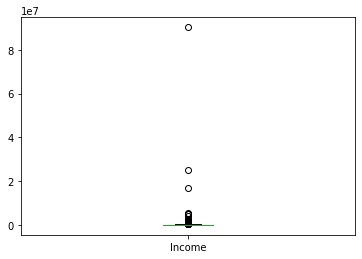

In [49]:
# Checking income variable values in missing value dataset

train_df['Income'][train_df['flag']==0].plot.box()

In [50]:
# Understanding correlation between variables in the missing value dataset

train_df[train_df['flag']==0].corr()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target,flag
id,1.000000,-0.002707,0.006821,-0.021642,-0.023749,0.009900,0.004217,-0.206364,-0.020687,0.010813,NaN
perc_premium_paid_by_cash_credit,-0.002707,1.000000,-0.362120,-0.032044,0.084638,0.265629,0.124886,NaN,-0.356671,-0.334613,NaN
age_in_days,0.006821,-0.362120,1.000000,0.019761,-0.053431,-0.131834,-0.045637,-0.097506,0.299627,0.151250,NaN
Income,-0.021642,-0.032044,0.019761,1.000000,-0.009154,-0.009816,-0.006363,0.256887,0.047061,0.015647,NaN
Count_3-6_months_late,-0.023749,0.084638,-0.053431,-0.009154,1.000000,0.086117,0.372988,NaN,0.160103,-0.159789,NaN
Count_6-12_months_late,0.009900,0.265629,-0.131834,-0.009816,0.086117,1.000000,0.094162,NaN,-0.119274,-0.238853,NaN
Count_more_than_12_months_late,0.004217,0.124886,-0.045637,-0.006363,0.372988,0.094162,1.000000,NaN,0.024316,-0.210216,NaN
application_underwriting_score,-0.206364,NaN,-0.097506,0.256887,NaN,NaN,NaN,1.000000,NaN,-0.422165,NaN
no_of_premiums_paid,-0.020687,-0.356671,0.299627,0.047061,0.160103,-0.119274,0.024316,NaN,1.000000,0.111673,NaN
target,0.010813,-0.334613,0.151250,0.015647,-0.159789,-0.238853,-0.210216,-0.422165,0.111673,1.000000,NaN


**Based on the analysis, its identified that the application underwriting score has a dependency on income and the no.of months of late premium payment has a dependency on the percentage of the premium paid. Since the missing values has no relationship with itself but has relationship with other variables, the data is missing at random (MAR).**

## 4.2 Handling missing values

**As the dataset is not a well balanced classification set, deletion will lead to loss of data. Hence imputation technique is opted. Both the variables - income and the no.of months of late premium payment have skewed distribution, imputation by median method is chosen.**

In [51]:
# Imputing column median for training data

train_df.fillna(train_df.median(), inplace=True)
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,79853.0,57167.166368,32928.970160,2.0,28640.000,57262.000,85632.000,114076.00
perc_premium_paid_by_cash_credit,79853.0,0.314288,0.334915,0.0,0.034,0.167,0.538,1.00
age_in_days,79853.0,18846.696906,5208.719136,7670.0,14974.000,18625.000,22636.000,37602.00
Income,79853.0,208847.171177,496582.597257,24030.0,108010.000,166560.000,252090.000,90262600.00
Count_3-6_months_late,79853.0,0.248369,0.691102,0.0,0.000,0.000,0.000,13.00
Count_6-12_months_late,79853.0,0.078093,0.436251,0.0,0.000,0.000,0.000,17.00
Count_more_than_12_months_late,79853.0,0.059935,0.311840,0.0,0.000,0.000,0.000,11.00
application_underwriting_score,79853.0,99.072606,0.726395,91.9,98.830,99.210,99.520,99.89
no_of_premiums_paid,79853.0,10.863887,5.170687,2.0,7.000,10.000,14.000,60.00
target,79853.0,0.937410,0.242226,0.0,1.000,1.000,1.000,1.00


In [52]:
# looking for missing values in the datasaet

train_df.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
target                              0
flag                                0
dtype: int64

In [54]:
# Imputing column median for test data

test_df=pd.read_csv('test.csv')
test_df.fillna(test_df.median(), inplace=True)
test_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,34224.0,56739.956376,32935.402647,1.0,28254.750,56488.000,85386.25,114077.00
perc_premium_paid_by_cash_credit,34224.0,0.314457,0.334059,0.0,0.034,0.169,0.54,1.00
age_in_days,34224.0,18824.215346,5246.525604,7671.0,14972.000,18623.000,22636.00,35785.00
Income,34224.0,202820.127104,270253.607996,24030.0,106397.500,165070.000,250020.00,21914550.00
Count_3-6_months_late,34224.0,0.238517,0.685889,0.0,0.000,0.000,0.00,12.00
Count_6-12_months_late,34224.0,0.080645,0.454435,0.0,0.000,0.000,0.00,10.00
Count_more_than_12_months_late,34224.0,0.058059,0.306912,0.0,0.000,0.000,0.00,7.00
application_underwriting_score,34224.0,99.067623,0.728999,91.9,98.830,99.210,99.52,99.89
no_of_premiums_paid,34224.0,10.890428,5.216867,2.0,7.000,10.000,14.00,59.00


In [55]:
# looking for missing values in the datasaet

test_df.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
dtype: int64

**The values are impute for both the training and the test set.**

# 5. Outliers

Outlier count -  3307


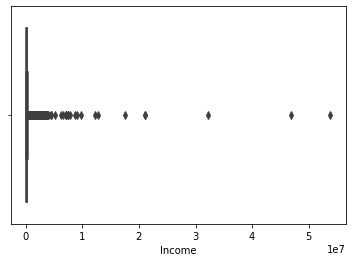

In [56]:
# Creating boxplots for all the continuous variables

sn.boxplot(df['Income'])

IQR = df['Income'].quantile(0.75) - df['Income'].quantile(0.25)
print("Outlier count - ", df[df['Income']>(df['Income'].quantile(0.75)+ (1.5* IQR))]['id'].count() + df[df['Income']<(df['Income'].quantile(0.25) - (1.5* IQR))]['id'].count())

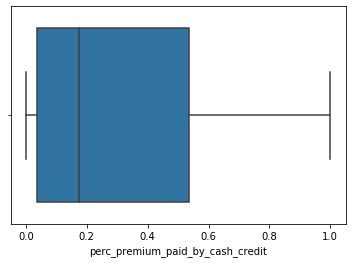

In [57]:
# Creating boxplots for all the continuous variables

sn.boxplot(df['perc_premium_paid_by_cash_credit'])


Outlier count -  80


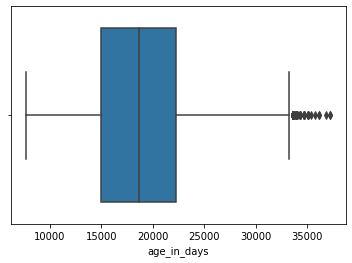

In [58]:
# Creating boxplots for all the continuous variables

sn.boxplot(df['age_in_days'])

IQR = df['age_in_days'].quantile(0.75) - df['age_in_days'].quantile(0.25)
print("Outlier count - ", df[df['age_in_days']>(df['age_in_days'].quantile(0.75)+ (1.5* IQR))]['id'].count() + df[df['age_in_days']<(df['age_in_days'].quantile(0.25) - (1.5* IQR))]['id'].count())

Outlier count -  3381


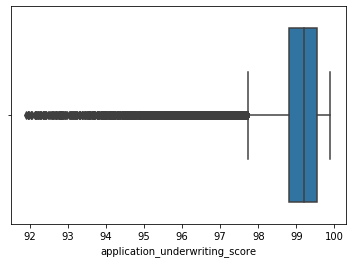

In [59]:
# Creating boxplots for all the continuous variables

sn.boxplot(df['application_underwriting_score'])

IQR = df['application_underwriting_score'].quantile(0.75) - df['application_underwriting_score'].quantile(0.25)
print("Outlier count - ", df[df['application_underwriting_score']>(df['application_underwriting_score'].quantile(0.75)+ (1.5* IQR))]['id'].count() + df[df['application_underwriting_score']<(df['application_underwriting_score'].quantile(0.25) - (1.5* IQR))]['id'].count())

Outlier count -  1407


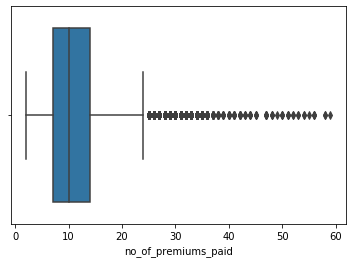

In [60]:
# Creating boxplots for all the continuous variables

sn.boxplot(df['no_of_premiums_paid'])

IQR = df['no_of_premiums_paid'].quantile(0.75) - df['no_of_premiums_paid'].quantile(0.25)
print("Outlier count - ", df[df['no_of_premiums_paid']>(df['no_of_premiums_paid'].quantile(0.75)+ (1.5* IQR))]['id'].count() + df[df['no_of_premiums_paid']<(df['no_of_premiums_paid'].quantile(0.25) - (1.5* IQR))]['id'].count())

**The outliers in the data looks reasonable due to the distribution being skewed hence they are left as such.**

# 6. Variable encoding & Dataset split for validation

**The categorical variables are encoded into 0s and 1s before building the model.**

In [64]:
# Categorical variables in the dataset

cat_var

['id', 'sourcing_channel', 'residence_area_type', 'target']

In [66]:
cat_var.remove('id')

In [67]:
cat_var.remove('target')

In [69]:
# Creating dummy variables for both training ang and the test set

final_train_df= pd.get_dummies(train_df,columns=cat_var, drop_first = True )
final_test_df= pd.get_dummies(test_df,columns=cat_var, drop_first = True )

In [70]:
# Checking the dummy variables created on training set

final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79853 non-null  float64
 5   Count_6-12_months_late            79853 non-null  float64
 6   Count_more_than_12_months_late    79853 non-null  float64
 7   application_underwriting_score    79853 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   target                            79853 non-null  int64  
 10  flag                              79853 non-null  int64  
 11  sourcing_channel_B                79853 non-null  uint8  
 12  sour

In [71]:
# Checking the dummy variables created on test set

final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34224 entries, 0 to 34223
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                34224 non-null  int64  
 1   perc_premium_paid_by_cash_credit  34224 non-null  float64
 2   age_in_days                       34224 non-null  int64  
 3   Income                            34224 non-null  int64  
 4   Count_3-6_months_late             34224 non-null  float64
 5   Count_6-12_months_late            34224 non-null  float64
 6   Count_more_than_12_months_late    34224 non-null  float64
 7   application_underwriting_score    34224 non-null  float64
 8   no_of_premiums_paid               34224 non-null  int64  
 9   sourcing_channel_B                34224 non-null  uint8  
 10  sourcing_channel_C                34224 non-null  uint8  
 11  sourcing_channel_D                34224 non-null  uint8  
 12  sour

## 6.1 Training and validation data split

**Training dataset is further split into 80% training set and 20% validation set.**

In [72]:
final_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79853 non-null  float64
 5   Count_6-12_months_late            79853 non-null  float64
 6   Count_more_than_12_months_late    79853 non-null  float64
 7   application_underwriting_score    79853 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   target                            79853 non-null  int64  
 10  flag                              79853 non-null  int64  
 11  sourcing_channel_B                79853 non-null  uint8  
 12  sour

In [73]:
# Seperating the dependent variable from the independent variables in the dataset

Y = final_train_df.filter(['target'], axis =1)

In [74]:
Y

,target
0,1
1,1
2,0
3,1
4,1
...,...
79848,1
79849,1
79850,1
79851,1


In [75]:
# Removing all variables that are not independent variabes - target

X = final_train_df.copy()

X.drop(['target'], axis=1, inplace=True)


In [76]:
# Removing all variables that are not independent variabes - flag

X.drop(['flag'], axis=1, inplace=True)

In [77]:
# Removing all variables that are not independent variabes - ID

X.drop(['id'], axis=1, inplace=True)

In [78]:
# Analysing structure of the resultant dataset 

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   perc_premium_paid_by_cash_credit  79853 non-null  float64
 1   age_in_days                       79853 non-null  int64  
 2   Income                            79853 non-null  int64  
 3   Count_3-6_months_late             79853 non-null  float64
 4   Count_6-12_months_late            79853 non-null  float64
 5   Count_more_than_12_months_late    79853 non-null  float64
 6   application_underwriting_score    79853 non-null  float64
 7   no_of_premiums_paid               79853 non-null  int64  
 8   sourcing_channel_B                79853 non-null  uint8  
 9   sourcing_channel_C                79853 non-null  uint8  
 10  sourcing_channel_D                79853 non-null  uint8  
 11  sourcing_channel_E                79853 non-null  uint8  
 12  resi

In [79]:
# Splitting the dataset into training and valuadation in the ratio 80-20 with stratified outcomes in both split sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 42, stratify = Y)

In [80]:
# Checking the shape of the split datasets

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((63882, 13), (15971, 13), (63882, 1), (15971, 1))

# 7. Model Building - Logistic Regression

Logistic regression is used here to predict the yes/ no outcome.

## 7.1 Creating a model

In [81]:
# Creating a model for logistic regression

from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

## 7.2 Fitting training data in model

In [82]:
# Fitting the training data into the model

logreg.fit(X_train,y_train)

C:\Users\Vinu\Python3.7\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 7.3 Predicting the outcomes

In [83]:
# Predicting the outcome probability in vaidation set

pred_prob= logreg.predict_proba(X_test)
pred_prob

array([[0.04169144, 0.95830856],
       [0.06784235, 0.93215765],
       [0.20172412, 0.79827588],
       ...,
       [0.04026071, 0.95973929],
       [0.11558342, 0.88441658],
       [0.03533228, 0.96466772]])

In [84]:
# Predicting the outcome in vaidation set for cut-off probability of default 0.5

pred=logreg.predict(X_test)
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## 7.4 Model Evaluation

## 7.4.1 Calculating the model accuracy

In [85]:
# Validating on the split test set

logreg.score(X_test,y_test) 

0.937386513054912

**Model accuracy on test data (split from original training set for validation) = 93.74%**

In [86]:
# Validating on the split training set

logreg.score(X_train,y_train)

0.9374158604927836

**Model accuracy on training data (split from original training set for training) = 93.74%**

## 7.4.2 Confusion matrix

In [87]:
# Generating confusion matrix for the validation set for cut-off probability of default 0.5

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[    0,  1000],
       [    0, 14971]], dtype=int64)

## 7.4.3 AUC ROC 

In [88]:
# AUC-ROC for the validation set for cut-off probability of default 0.5

from sklearn.metrics import roc_auc_score

roc=roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
print(roc)

0.6165003005811235


**At 0.5 cut-off probability the model doest classify any true negatives correctly. Hence an optimal cut-off probaibility is to be identified.**

## 7.4.4 Identifying optimal cut-off probability

**Given the problem statement, the ultimate goal is to identify all the customers who might default the next payment with more accuracy than the customers who will pay the next payment without fail. Hence the more wightage is provided for a true negative classification than a true positive classification.**

In [90]:
from sklearn import metrics

# Performing gridsearch for optimal cut-off probability

pred_proba_df = pd.DataFrame(logreg.predict_proba(X_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n\nCut-off =',format(i))
    
    #Mapping the probabilities with outcomes for iterated threshold
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x >i else 0)
    
    #Calcuating the accuracy of the model
    test_accuracy = metrics.accuracy_score(y_test.to_numpy().reshape(y_test.to_numpy().size,1),
                                           y_test_pred.iloc[:,1].to_numpy().reshape(y_test_pred.iloc[:,1].to_numpy().size,1))
    print('Accuracy=',format(test_accuracy))
    
    # Calculating AUC-ROC for for iterated threshold 
    y_test_ROC_pred = []
    for z in range(len(y_test_pred)):
        y_test_ROC_pred.append(y_test_pred[0][z] or y_test_pred[1][z])
    #y_test_ROC_pred.drop([1], axis =1)
    #print(y_test_ROC_pred[0:5])
    print('ROC=',roc_auc_score(y_test,y_test_ROC_pred))

    # Generating confusion matrix for iterated threshold
    conf_matrix = confusion_matrix(y_test.to_numpy().reshape(y_test.to_numpy().size,1),
                           y_test_pred.iloc[:,1].to_numpy().reshape(y_test_pred.iloc[:,1].to_numpy().size,1))
    
    #True negative rate
    tnr = (conf_matrix[0][0]/ (conf_matrix[0][0] + conf_matrix[0][1]))
    
    #True positive rate
    fpr = (conf_matrix[0][1]/ (conf_matrix[0][0] + conf_matrix[0][1]))
    
    print("TNR=",tnr)  
    print("FPR=",fpr)  



Cut-off = 0.05
Accuracy= 0.937386513054912
ROC= 0.5
TNR= 0.0
FPR= 1.0


Cut-off = 0.1
Accuracy= 0.937386513054912
ROC= 0.5
TNR= 0.0
FPR= 1.0


Cut-off = 0.15
Accuracy= 0.937386513054912
ROC= 0.5
TNR= 0.0
FPR= 1.0


Cut-off = 0.2
Accuracy= 0.937386513054912
ROC= 0.5
TNR= 0.0
FPR= 1.0


Cut-off = 0.25
Accuracy= 0.937386513054912
ROC= 0.5
TNR= 0.0
FPR= 1.0


Cut-off = 0.3
Accuracy= 0.937386513054912
ROC= 0.5
TNR= 0.0
FPR= 1.0


Cut-off = 0.35
Accuracy= 0.937386513054912
ROC= 0.5
TNR= 0.0
FPR= 1.0


Cut-off = 0.4
Accuracy= 0.937386513054912
ROC= 0.5
TNR= 0.0
FPR= 1.0


Cut-off = 0.45
Accuracy= 0.937386513054912
ROC= 0.5
TNR= 0.0
FPR= 1.0


Cut-off = 0.5
Accuracy= 0.937386513054912
ROC= 0.5
TNR= 0.0
FPR= 1.0


Cut-off = 0.55
Accuracy= 0.937386513054912
ROC= 0.5
TNR= 0.0
FPR= 1.0


Cut-off = 0.6
Accuracy= 0.937386513054912
ROC= 0.5
TNR= 0.0
FPR= 1.0


Cut-off = 0.65
Accuracy= 0.937386513054912
ROC= 0.5
TNR= 0.0
FPR= 1.0


Cut-off = 0.7
Accuracy= 0.937386513054912
ROC= 0.5
TNR= 0.0
FPR= 1.0

**After analysing the range of cut-off probabilites and the model presformances respectively, the prediction on the given test is done**

# 7.5. Predicting on the original test data

In [91]:
# Summarizing the given test set

final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34224 entries, 0 to 34223
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                34224 non-null  int64  
 1   perc_premium_paid_by_cash_credit  34224 non-null  float64
 2   age_in_days                       34224 non-null  int64  
 3   Income                            34224 non-null  int64  
 4   Count_3-6_months_late             34224 non-null  float64
 5   Count_6-12_months_late            34224 non-null  float64
 6   Count_more_than_12_months_late    34224 non-null  float64
 7   application_underwriting_score    34224 non-null  float64
 8   no_of_premiums_paid               34224 non-null  int64  
 9   sourcing_channel_B                34224 non-null  uint8  
 10  sourcing_channel_C                34224 non-null  uint8  
 11  sourcing_channel_D                34224 non-null  uint8  
 12  sour

In [92]:
# Separating the ID column from rest of the independent variables 

ID = final_test_df.filter(['id'],  axis =1)

In [93]:
ID_map = ID

In [94]:
# Removing the columns that are not useful for prediction - ID

final_test_df.drop(['id'], axis =1, inplace = True)

In [96]:
final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34224 entries, 0 to 34223
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   perc_premium_paid_by_cash_credit  34224 non-null  float64
 1   age_in_days                       34224 non-null  int64  
 2   Income                            34224 non-null  int64  
 3   Count_3-6_months_late             34224 non-null  float64
 4   Count_6-12_months_late            34224 non-null  float64
 5   Count_more_than_12_months_late    34224 non-null  float64
 6   application_underwriting_score    34224 non-null  float64
 7   no_of_premiums_paid               34224 non-null  int64  
 8   sourcing_channel_B                34224 non-null  uint8  
 9   sourcing_channel_C                34224 non-null  uint8  
 10  sourcing_channel_D                34224 non-null  uint8  
 11  sourcing_channel_E                34224 non-null  uint8  
 12  resi

In [97]:
"""# Removing the columns that are not useful for prediction - flag

final_test_df.drop(['Flag'], axis = 1, inplace = True)"""

"# Removing the columns that are not useful for prediction - flag\n\nfinal_test_df.drop(['Flag'], axis = 1, inplace = True)"

In [98]:
# Summarizing the given test set

final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34224 entries, 0 to 34223
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   perc_premium_paid_by_cash_credit  34224 non-null  float64
 1   age_in_days                       34224 non-null  int64  
 2   Income                            34224 non-null  int64  
 3   Count_3-6_months_late             34224 non-null  float64
 4   Count_6-12_months_late            34224 non-null  float64
 5   Count_more_than_12_months_late    34224 non-null  float64
 6   application_underwriting_score    34224 non-null  float64
 7   no_of_premiums_paid               34224 non-null  int64  
 8   sourcing_channel_B                34224 non-null  uint8  
 9   sourcing_channel_C                34224 non-null  uint8  
 10  sourcing_channel_D                34224 non-null  uint8  
 11  sourcing_channel_E                34224 non-null  uint8  
 12  resi

In [99]:
# Predicting the probabilites for each outcome

test_pred_prob= logreg.predict_proba(final_test_df)
test_pred_prob

array([[0.02202723, 0.97797277],
       [0.02543076, 0.97456924],
       [0.06865971, 0.93134029],
       ...,
       [0.05887605, 0.94112395],
       [0.06940725, 0.93059275],
       [0.03065415, 0.96934585]])

In [100]:
# Conveting the predicted probabilites to the outcomes as per the cut-off probability - 0.85

test_pred_proba_df = pd.DataFrame(test_pred_prob)

test_pred_outcome = []

test_pred_prob_df = test_pred_proba_df.applymap(lambda x: 1 if x >0.95 else 0)
for z in range(len(test_pred_prob_df)):
        test_pred_outcome.append(test_pred_prob_df[0][z] or test_pred_prob_df[1][z])

print(test_pred_outcome)

[1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 

In [101]:
# Checking on dimenetions for errors

len(ID_map), len(test_pred_outcome)

(34224, 34224)

In [102]:
# Appending ID and outcomes to a dataframe

final_outcome = pd.DataFrame()
final_outcome['id'] = ID_map['id'].tolist()
final_outcome['target'] = test_pred_outcome
final_outcome

,id,target
0,649,1
1,81136,1
2,70762,0
3,53935,0
4,15476,0
...,...,...
34219,81988,1
34220,30326,0
34221,65749,0
34222,65686,0


In [103]:
# Summarizing the outcome results

final_outcome['target'].value_counts()

0    18722
1    15502
Name: target, dtype: int64

In [104]:
# Saving the outcome to a file

final_outcome.to_csv('outcomes_LR.csv', index=False)

# 8. Model building - Decision Tree

## 8.1 Creating a model and fitting in training data

In [ ]:
#pip install graphviz

In [108]:
# importing libraries

from sklearn import tree
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.44.1-win32/Graphviz/bin/'

In [109]:
# Creating decision tree model and fitting the training data

dt = tree.DecisionTreeClassifier(criterion = "gini",
                                 random_state = 42,
                                 max_depth=3, 
                                 min_samples_split=80, 
                                 min_samples_leaf=50, 
                                 class_weight = 'balanced')

dt_model = dt.fit(X_train,y_train)

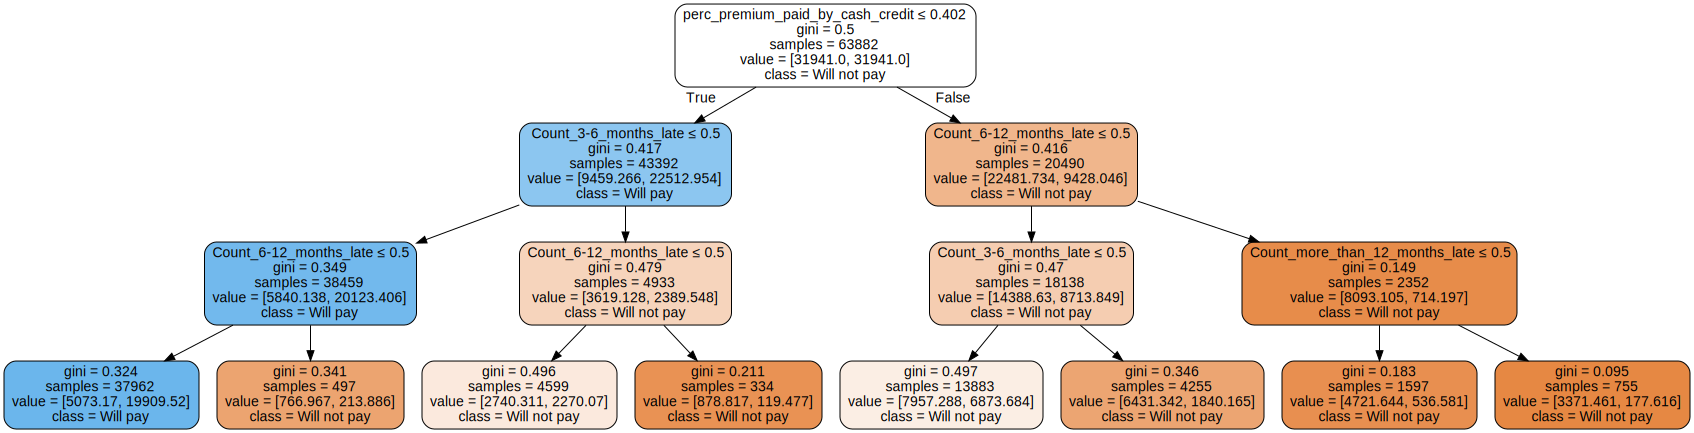

In [111]:
# Visualizing the tree

import graphviz 

vis_tree = tree.export_graphviz(dt_model,out_file=None,
                                feature_names=X_train.columns,  
                                class_names=['Will not pay','Will pay'],  
                                filled=True, rounded=True,  
                                special_characters=True) 

graph = graphviz.Source(vis_tree) 
#graph.render("decision_tree") 
graph.view
graph

## 8.2 Predicting outcomes for validation data

In [112]:
# Creating a base template for prediction

def get_predictions ( test_class, model, test_data ):
    y_pred_df = pd.DataFrame( { 'actual_class': test_class,
                               'predicted_value': dt_model.predict(test_data)})
    return y_pred_df

In [116]:
# Mapping prediction outcomes with classes

ser = y_test
status_dict = {1:"Will Pay", 0:"Will not pay"}
y_test = ser.replace(dict(actual_target=status_dict))
#y_test.rename({'target': 'actual_target'}, axis='columns', inplace=True )
y_test.head()

,actual_target
13124,Will Pay
15228,Will Pay
36808,Will not pay
71838,Will not pay
66579,Will Pay


In [118]:
# Comparing the predictions with the actual output

dt_model_df = pd.DataFrame(get_predictions(y_test.actual_target, dt_model, X_test))
dt_model_df.head()

,actual_class,predicted_value
13124,Will Pay,0
15228,Will Pay,1
36808,Will not pay,0
71838,Will not pay,0
66579,Will Pay,1


In [123]:
#dt_model_df.drop(['predicted_class'], axis=1, inplace= True)

In [124]:
# Comparing the actula and predicted values

dt_model_df['predicted_class'] = dt_model_df.predicted_value.map(lambda x: 'Will Pay' if x >= 1 else 'Will not pay')
dt_model_df.head()

,actual_class,predicted_value,predicted_class
13124,Will Pay,0,Will not pay
15228,Will Pay,1,Will Pay
36808,Will not pay,0,Will not pay
71838,Will not pay,0,Will not pay
66579,Will Pay,1,Will Pay


## 8.3 Model accuracy in validation data

In [125]:
from sklearn.metrics import classification_report

In [126]:
# Generating a confusion matrix for model accuracy

print("The dt model with dummy variable coding output: ")

confusion_matrix(dt_model_df.actual_class, dt_model_df.predicted_class)

dt_report = (classification_report(dt_model_df.actual_class, dt_model_df.predicted_class))
print(dt_report)

The dt model with dummy variable coding output: 
              precision    recall  f1-score   support

    Will Pay       0.98      0.62      0.76     14971
Will not pay       0.13      0.85      0.23      1000

    accuracy                           0.64     15971
   macro avg       0.56      0.74      0.49     15971
weighted avg       0.93      0.64      0.73     15971



In [127]:
# Calculating model accuracy - parameters

def measure_performance (clasf_matrix):
    measure = pd.DataFrame({
                        'sensitivity': [round(clasf_matrix[0,0]/(clasf_matrix[0,0]+clasf_matrix[0,1]),2)], 
                        'specificity': [round(clasf_matrix[1,1]/(clasf_matrix[1,0]+clasf_matrix[1,1]),2)],
                        'recall': [round(clasf_matrix[0,0]/(clasf_matrix[0,0]+clasf_matrix[0,1]),2)],
                        'precision': [round(clasf_matrix[0,0]/(clasf_matrix[0,0]+clasf_matrix[1,0]),2)],
                        'overall_acc': [round((clasf_matrix[0,0]+clasf_matrix[1,1])/
                                              (clasf_matrix[0,0]+clasf_matrix[0,1]+clasf_matrix[1,0]+clasf_matrix[1,1]),2)]
                       })
    return measure

In [128]:
# Summarizing model accuracy

cm = metrics.confusion_matrix(dt_model_df.actual_class, dt_model_df.predicted_class)

dt_model_metrics_df = pd.DataFrame(measure_performance(cm))
dt_model_metrics_df

,sensitivity,specificity,recall,precision,overall_acc
0,0.62,0.85,0.62,0.98,0.64


## 8.4 Hyperparameter tuning

In [129]:
# Finding the optimal paramters for the decision tree

criterion = ['gini','entropy']     
max_features = [None, 'auto', 'log2','sqrt']
max_depth = [2,3,4]
min_samples_split = [50,75,100,120]
min_samples_leaf = [50, 75]
class_weight = ['balanced',None]

# Create the grid
random_grid = {'criterion': criterion,
               'max_features' :  max_features,
               'max_depth' :  max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf' : min_samples_leaf,
               'class_weight' : class_weight}
random_grid

{'criterion': ['gini', 'entropy'],
 'max_features': [None, 'auto', 'log2', 'sqrt'],
 'max_depth': [2, 3, 4],
 'min_samples_split': [50, 75, 100, 120],
 'min_samples_leaf': [50, 75],
 'class_weight': ['balanced', None]}

In [130]:
# Using the random grid to search for best hyperparameters
from sklearn.model_selection import GridSearchCV

tree_model = tree.DecisionTreeClassifier(random_state=42)

# Random search of parameters, using 3 fold cross validation 
best_tree_model = GridSearchCV(estimator = tree_model, 
                               param_grid = random_grid, 
                               scoring = "precision",
                               cv = 3, verbose=0)
# Fitting the random search model
best_tree_model.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'class_weight': ['balanced', None],
                   

In [131]:
# Tuned parameters

best_tree_model.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 50,
 'min_samples_split': 50}

In [133]:
# PRedicting the outcomes with the optimal DT parameters

best_tree_model_df = pd.DataFrame(get_predictions(y_test.actual_target, best_tree_model, X_test))
best_tree_model_df.head()

,actual_class,predicted_value
13124,Will Pay,0
15228,Will Pay,1
36808,Will not pay,0
71838,Will not pay,0
66579,Will Pay,1


In [134]:
# Mapping predicted outcomes to classes

best_tree_model_df['predicted_class'] = best_tree_model_df.predicted_value.map(lambda x: 'Will Pay' 
                                                                               if x >= 1 else 'Will not pay')
best_tree_model_df[0:10]

,actual_class,predicted_value,predicted_class
13124,Will Pay,0,Will not pay
15228,Will Pay,1,Will Pay
36808,Will not pay,0,Will not pay
71838,Will not pay,0,Will not pay
66579,Will Pay,1,Will Pay
74603,Will Pay,1,Will Pay
40910,Will Pay,1,Will Pay
55600,Will Pay,0,Will not pay
57420,Will Pay,1,Will Pay
7245,Will Pay,0,Will not pay


In [135]:
# Gerenating model accuracy 

cm = metrics.confusion_matrix(best_tree_model_df.actual_class, best_tree_model_df.predicted_class)

best_dt_model_metrics_df = pd.DataFrame(measure_performance(cm))
best_dt_model_metrics_df

,sensitivity,specificity,recall,precision,overall_acc
0,0.62,0.85,0.62,0.98,0.64


## 8.5 Predicting the outcomes in original test data

In [136]:
# Summarizing the original test data

final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34224 entries, 0 to 34223
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   perc_premium_paid_by_cash_credit  34224 non-null  float64
 1   age_in_days                       34224 non-null  int64  
 2   Income                            34224 non-null  int64  
 3   Count_3-6_months_late             34224 non-null  float64
 4   Count_6-12_months_late            34224 non-null  float64
 5   Count_more_than_12_months_late    34224 non-null  float64
 6   application_underwriting_score    34224 non-null  float64
 7   no_of_premiums_paid               34224 non-null  int64  
 8   sourcing_channel_B                34224 non-null  uint8  
 9   sourcing_channel_C                34224 non-null  uint8  
 10  sourcing_channel_D                34224 non-null  uint8  
 11  sourcing_channel_E                34224 non-null  uint8  
 12  resi

In [137]:
# Summarizing the tuned parameters

best_tree_model.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 50,
 'min_samples_split': 50}

In [139]:
# Creating a DT model with tunes parameters

from sklearn.tree import DecisionTreeClassifier

In [142]:
# Creating a DT model with tunes parameters

clf = tree.DecisionTreeClassifier(class_weight = 'balanced',
                                 criterion = 'gini',
                                 max_depth = 4,
                                 max_features = 'auto',
                                 min_samples_leaf = 50,
                                 min_samples_split= 50)


In [143]:
# Fitting the training data

clf_model = clf.fit(X_train,y_train)

In [146]:
# Calculating score for the training

clf.score(X_train,y_train)

0.7653642653642654

In [148]:
# Checking witht the original outcomes

y_test

,actual_target
13124,Will Pay
15228,Will Pay
36808,Will not pay
71838,Will not pay
66579,Will Pay
...,...
3320,Will Pay
11658,Will Pay
68955,Will Pay
73494,Will Pay


In [149]:
# Mapping classes with outcome values

y_test_mapped = y_test.actual_target.map(lambda x: 1 if x == 'Will Pay' else 0)

In [152]:
#Calculating score for validation data

clf.score(X_test,y_test_mapped.to_frame())

0.7625696575042265

In [155]:
# Predicting outcomes for original test data

clf.predict(final_test_df)

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [157]:
#Retriving ID from the original test data

temp_file = pd.read_csv('test.csv')

In [158]:
temp_file['id']

0          649
1        81136
2        70762
3        53935
4        15476
         ...  
34219    81988
34220    30326
34221    65749
34222    65686
34223    93826
Name: id, Length: 34224, dtype: int64

In [159]:
# Creating a dataframe of respective IDs and the predicted outcomes

final_outcome = pd.DataFrame()
final_outcome['id'] = temp_file['id']
final_outcome['target'] = clf.predict(final_test_df)
final_outcome

,id,target
0,649,1
1,81136,1
2,70762,1
3,53935,1
4,15476,1
...,...,...
34219,81988,1
34220,30326,1
34221,65749,1
34222,65686,0


In [160]:
# Summarizing the outcome results

final_outcome['target'].value_counts()

1    25468
0     8756
Name: target, dtype: int64

In [161]:
# Saving the outcome to a file

final_outcome.to_csv('outcomes_DT.csv', index=False)

## **End of document**

In [163]:
temp_train = pd.read_csv('train.csv')

In [164]:
temp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79853 entries, 0 to 79852
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                79853 non-null  int64  
 1   perc_premium_paid_by_cash_credit  79853 non-null  float64
 2   age_in_days                       79853 non-null  int64  
 3   Income                            79853 non-null  int64  
 4   Count_3-6_months_late             79756 non-null  float64
 5   Count_6-12_months_late            79756 non-null  float64
 6   Count_more_than_12_months_late    79756 non-null  float64
 7   application_underwriting_score    76879 non-null  float64
 8   no_of_premiums_paid               79853 non-null  int64  
 9   sourcing_channel                  79853 non-null  object 
 10  residence_area_type               79853 non-null  object 
 11  target                            79853 non-null  int64  
dtypes: f

In [169]:
temp_train['Count_more_than_12_months_late'].median()

0.0

In [170]:
temp_train['Count_more_than_12_months_late'].median()

0.0

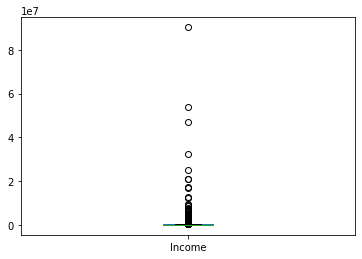

In [171]:
final_train_df['Income'].plot.box()

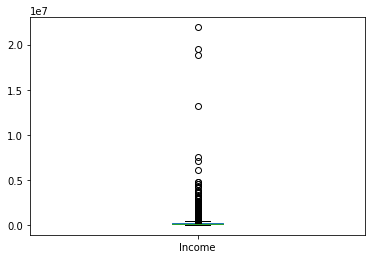

In [172]:
final_test_df['Income'].plot.box()

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_df))
print(z)